# Частотный анализ русского текста

## Загрузка данных

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/dante/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dante/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
f = open('dataset.txt', "r", encoding="utf-8")
text = f.read()

## Занижение регистра

In [3]:
text = text.lower()

## Удаление специальных символов и знаков препинания

In [4]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [5]:
spec_chars = string.punctuation + '\n\xa0«»\t—…:;' 

In [6]:
text = "".join([ch for ch in text if ch not in spec_chars])


In [7]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [8]:
text = remove_chars_from_text(text, spec_chars)
text = remove_chars_from_text(text, string.digits)

## Токенизация

In [9]:
from nltk import word_tokenize
text_tokens = word_tokenize(text)

In [10]:
len(text_tokens)
text_tokens[:10]
import nltk
text = nltk.Text(text_tokens)

## Статистика без правок

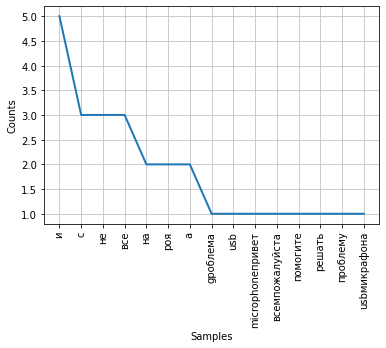

[('и', 5),
 ('с', 3),
 ('не', 3),
 ('все', 3),
 ('на', 2),
 ('роя', 2),
 ('а', 2),
 ('gроблема', 1),
 ('usb', 1),
 ('microphoneпривет', 1)]

In [11]:
from nltk.probability import FreqDist
fdist = FreqDist(text)
fdist.plot(15,cumulative=False)
fdist = FreqDist(text)
fdist.most_common(10)

## Статистика без "шума"

In [12]:
from nltk.probability import FreqDist
fdist_sw = FreqDist(text)

In [13]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

In [14]:
text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]
text = nltk.Text(text_tokens)

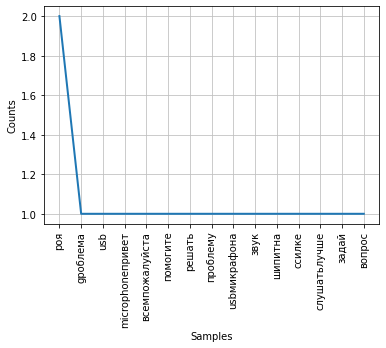

[('роя', 2),
 ('gроблема', 1),
 ('usb', 1),
 ('microphoneпривет', 1),
 ('всемпожалуйста', 1),
 ('помогите', 1),
 ('решать', 1),
 ('проблему', 1),
 ('usbмикрафона', 1),
 ('звук', 1)]

In [17]:
fdist_sw.plot(15,cumulative=False)
fdist = FreqDist(text)
fdist.most_common(10)